In [1]:
import scipy.ndimage
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

# Load Data Matrix

In [2]:
data_matrix = [0] * 10304
for i in range(40):
    for j in range(10):
        image_matrix = scipy.ndimage.imread('E:/TERM/TERM8/Pattern Recognition/Assignments/Assignments1/orl_faces/s' + str(i+1)+'/' +
                                 str(j+1) +'.pgm',flatten=False, mode=None)
        image_pixels_vector = np.asarray(image_matrix).reshape(-1)
        data_matrix = np.vstack([data_matrix, image_pixels_vector])

In [3]:
data_matrix = data_matrix[1:,0:]
print(len(data_matrix[:,0]))

400


# Create Label Vector

In [4]:
data_labels = []
for i in range(40):
    for j in range (10):
        data_labels.append(i+1)
print(len(data_labels))

400


In [5]:
# used to build the KNN classifier according to the number of nearest neighbors
def KNN(training_data_proj, test_data_proj, training_data_labels, test_data_labels, k):
    
    # satisfy the number of neighbors for the classifier
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    
    # build the classifier using the training data and their label
    knn_classifier.fit(training_data_proj, training_data_labels)
    
    # predict the labels of the test data using the knn classifier
    predicted_labels = knn_classifier.predict(test_data_proj)
    
    # calculate the accuracy of the classifier
    accurancy_measurment =  accuracy_score(test_data_labels, predicted_labels)
    return accurancy_measurment

In [6]:
def cov_matrix_total_variance(training_data):
    # calculate the mean vector of training data
    training_data_mean = np.mean(training_data,axis=0)
    
    # center the training data by letting the mean the original point 
    centered_training_data = training_data - training_data_mean
    
    # calculate the covariance matrix of training data and the total variance
    cov_matrix = np.cov(centered_training_data.T, bias =True)
    total_variance = cov_matrix.trace()
    return cov_matrix, total_variance

In [7]:
def PCA_cov_matrix_eigen_values_vectors (cov_matrix):
    
    # calculate the eigenvalues and eigenvectors for covariance matrix sorted by the eigenvalues ascending
    eigen_values, eigen_vectors = np.linalg.eigh(cov_matrix)
    return eigen_values, eigen_vectors

In [8]:
# used to return the coordinates of the training and test data on the new dimensions according to alpha
def PCA_projection_matrix (eigen_values, eigen_vectors, total_variance, alpha):
    
    # choose the new dimensions (eigenvectors) according to alpha where summation of eigenvalues of the chosen eigenvectors > alpha
    eigen_values_sum = 0
    eigen_values_index = len(eigen_values) - 1
    while((eigen_values_sum / total_variance) < alpha):
        eigen_values_sum += eigen_values[eigen_values_index]
        eigen_values_index -= 1
    
    
    projection_matrix = eigen_vectors[:,eigen_values_index:]
    return projection_matrix

In [9]:
def PCA_data_projection(training_data, test_data, projection_matrix):
    # project the training and test data on the new dimensions
    training_data_proj = np.matmul(training_data, projection_matrix)
    test_data_proj = np.matmul(test_data, projection_matrix)
    return training_data_proj, test_data_proj

In [10]:
def split_50_50 ():
    training_data = data_matrix[0]
    test_data = data_matrix[1]
    training_data_labels = []
    test_data_labels = []

    training_data_labels.append(data_labels[0])
    test_data_labels.append(data_labels[1])
    index = 2 
    while(index < len(data_matrix[:,0])):
        if(index % 2 == 0):
            training_data = np.vstack([training_data, data_matrix[index]])
            training_data_labels.append(data_labels[index])
        else:
            test_data = np.vstack([test_data, data_matrix[index]])
            test_data_labels.append(data_labels[index])
        index += 1
    return training_data, test_data, training_data_labels, test_data_labels

In [11]:
def split_70_30 ():
    training_data = [0] * len(data_matrix[0])
    training_data_labels = []
    test_data = [0] * len(data_matrix[0])
    test_data_labels = []
    for i in range(40):
        for j in range(7):
            training_data = np.vstack([training_data, data_matrix[i*10 + j]])
            training_data_labels.append(data_labels[i*10 + j])
        for k in range(3):
            test_data = np.vstack([test_data, data_matrix[i*10 + 7 + k]])
            test_data_labels.append(data_labels[i*10 + 7 + k])

    training_data = training_data[1:,0:]
    test_data = test_data[1:,0:]
    return training_data, test_data, training_data_labels, test_data_labels

# PCA Classification using 50% Training Data & 50% Test Data

In [46]:
#split data matrix 50% for training data & 50% for test data
training_data, test_data, training_data_labels, test_data_labels = split_50_50()

#calculate training data covariance matrix and total variance
cov_matrix, total_variance = cov_matrix_total_variance(training_data)

#calculate training data covariance matrix eigenvalues & eigenvectors
eigen_values, eigen_vectors = PCA_cov_matrix_eigen_values_vectors(cov_matrix)

In [51]:
alpha = [0.8, 0.85, 0.9, 0.95]
score_list = []
# for each alpha, choose the new dimensions then evaluate the First nearest neighbor classifier on the modified data 
for i in alpha:
    projection_matrix = PCA_projection_matrix (eigen_values, eigen_vectors,total_variance, i)
    training_data_proj, test_data_proj = PCA_data_projection(training_data, test_data, projection_matrix)
    score = KNN(training_data_proj, test_data_proj, training_data_labels, test_data_labels,1)
    score_list.append(score * 100)
    print('For Alpha = ' + str(i) + ', Acuuracy = ' + str(score*100) + '%')

For Alpha = 0.8, Acuuracy = 95.0%
For Alpha = 0.85, Acuuracy = 95.0%
For Alpha = 0.9, Acuuracy = 94.0%
For Alpha = 0.95, Acuuracy = 94.0%


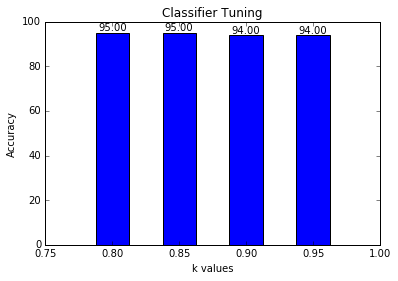

In [56]:
accuracy_bar = plt.bar(alpha, score_list, 0.025, align = 'center')
# Add counts above the bar graphs
for rect in accuracy_bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%0.2f' % int(height), ha='center', va='bottom')
plt.xlabel("k values")
plt.ylabel("Accuracy")
plt.show()

# PCA Classifier Tuning

In [53]:
projection_matrix = PCA_projection_matrix (eigen_values, eigen_vectors,total_variance, 0.9)
training_data_proj, test_data_proj = PCA_data_projection(training_data, test_data, projection_matrix)
knn = [1, 3, 5, 7]
score = []
for k in knn:
    score.append(KNN(training_data_proj, test_data_proj, training_data_labels, test_data_labels,k) * 100)
score

[94.0, 89.0, 84.5, 77.0]

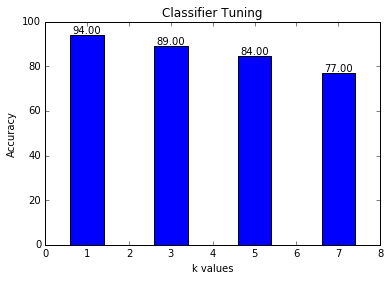

In [55]:
accuracy_bar = plt.bar(knn, score, align = 'center')
# Add counts above the bar graphs
for rect in accuracy_bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%0.2f' % int(height), ha='center', va='bottom')
plt.xlabel("k values")
plt.ylabel("Accuracy")
plt.title("Classifier Tuning")
plt.show()

# PCA Classification using 70% Training Data & 30% Test Data

In [57]:
#split data matrix 70% for training data & 30% for test data
training_data, test_data, training_data_labels, test_data_labels = split_70_30()

#calculate training data covariance matrix and total variance
cov_matrix, total_variance = cov_matrix_total_variance(training_data)

#calculate training data covariance matrix eigenvalues & eigenvectors
eigen_values, eigen_vectors = PCA_cov_matrix_eigen_values_vectors(cov_matrix)

In [58]:
alpha = [0.8, 0.85, 0.9, 0.95]
score_list = []
# for each alpha, choose the new dimensions then evaluate the First nearest neighbor classifier on the modified data 
for i in alpha:
    projection_matrix = PCA_projection_matrix (eigen_values, eigen_vectors,total_variance, i)
    training_data_proj, test_data_proj = PCA_data_projection(training_data, test_data, projection_matrix)
    score = KNN(training_data_proj, test_data_proj, training_data_labels, test_data_labels,1)
    score_list.append(score * 100)
    print('For Alpha = ' + str(i) + ', Acuuracy = ' + str(score*100) + '%')

For Alpha = 0.8, Acuuracy = 95.8333333333%
For Alpha = 0.85, Acuuracy = 96.6666666667%
For Alpha = 0.9, Acuuracy = 95.8333333333%
For Alpha = 0.95, Acuuracy = 95.0%


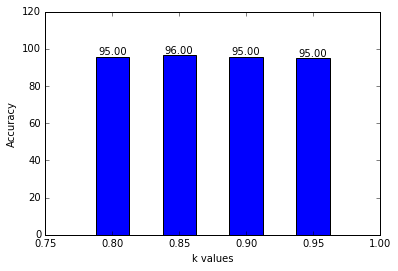

In [68]:
accuracy_bar = plt.bar(alpha, score_list, 0.025, align = 'center')
# Add counts above the bar graphs
for rect in accuracy_bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%0.2f' % int(height), ha='center', va='bottom')
plt.xlabel("k values")
plt.ylabel("Accuracy")

axes = plt.gca()
axes.set_ylim([0,120])

plt.show()

In [71]:
projection_matrix = PCA_projection_matrix (eigen_values, eigen_vectors,total_variance, 0.9)
training_data_proj, test_data_proj = PCA_data_projection(training_data, test_data, projection_matrix)
knn = [1, 3, 5, 7]
score = []
for k in knn:
    score.append(KNN(training_data_proj, test_data_proj, training_data_labels, test_data_labels,k) * 100.0)
score

[95.833333333333343, 91.666666666666657, 89.166666666666671, 85.0]

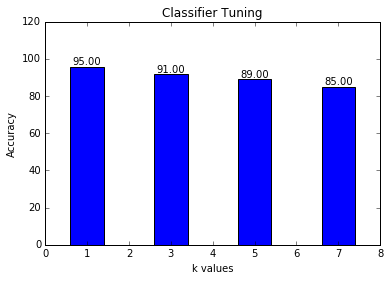

In [73]:
accuracy_bar = plt.bar(knn, score, align = 'center')
# Add counts above the bar graphs
for rect in accuracy_bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%0.2f' % int(height), ha='center', va='bottom')
plt.xlabel("k values")
plt.ylabel("Accuracy")
plt.title("Classifier Tuning")

axes = plt.gca()
axes.set_ylim([0,120])
plt.show()